In [1]:
from pixelbrain.database_processors.xgboost_processor import XGBoostRegressorTrainer, XGBoostDatabaseProcessor
from pixelbrain.database import Database
import os
import numpy as np
import pandas as pd


mongo_key=os.getenv("MONGO_URL")
db = Database(database_id="Selfyx", mongo_key=mongo_key)

data_field_names = [
    "cfg_scale",
    "pick_score",
    "similarity_score_nearest",
    "similarity_score_average_k_nearest",
    "similarity_score_maximum_distance",
    "generated_epoch"
]

metric_field_name = "human_rating"
field_names = data_field_names + [metric_field_name]
filters = { field_name: None for field_name in field_names }
data = db.find_images_with_filters(filters)
data_df = pd.DataFrame(data)
data_df


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


,_id,session_id,image_type,generated_epoch,prompt,negative_prompt,generating_lora,denoising_strength,hr_upscaler,hr_steps,...,face_embedding_tested_a0aace536d614b66,face_embedding_tested_ac85450b707542e0,face_embedding_tested_6597bddcad38435b,face_embedding_tested_8430b8605bc046df,face_embedding_tested_8355bdc7022241ff,face_embedding_tested_a9df719297904b1c,face_embedding_tested_7d35d7a74d10498f,face_embedding_tested_31d25b6da9e44bb5,face_embedding_tested_53daa339f8974f1b,face_embedding_tested_e3bb5316f4d74dd4
0,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,user_images/generated_images/demo/e3a809ac-04c...,e3a809ac-04c2-4095-9d22-e310ce07c3de,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/e3a809ac-04c2-4095-9d22-e310ce07c3d...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IN_VECTOR_STORE:/root/chroma/Selfyx
1661,user_images/generated_images/demo/e3a809ac-04c...,e3a809ac-04c2-4095-9d22-e310ce07c3de,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/e3a809ac-04c2-4095-9d22-e310ce07c3d...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IN_VECTOR_STORE:/root/chroma/Selfyx
1662,user_images/generated_images/demo/e3a809ac-04c...,e3a809ac-04c2-4095-9d22-e310ce07c3de,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/e3a809ac-04c2-4095-9d22-e310ce07c3d...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IN_VECTOR_STORE:/root/chroma/Selfyx
1663,user_images/generated_images/demo/e3a809ac-04c...,e3a809ac-04c2-4095-9d22-e310ce07c3de,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/e3a809ac-04c2-4095-9d22-e310ce07c3d...,0.65,Latent,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IN_VECTOR_STORE:/root/chroma/Selfyx


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [10:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Testing RMSE: 0.6900682163966552
Testing AUC: 0.5
FPR: [0. 1.], TPR: [0. 1.], Thresholds: [inf  0.]


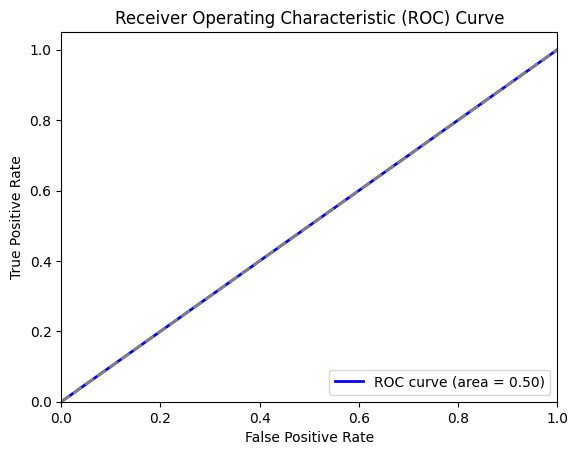

In [2]:
trainer = XGBoostRegressorTrainer(data_df, data_field_names, metric_field_name)
test_preds = trainer.fit(save_model_path="xgboost_rating_model.pkl", auc_threshold=4)



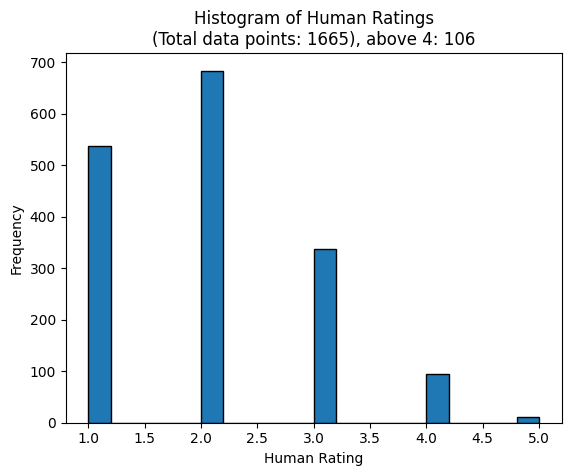

In [4]:
import matplotlib.pyplot as plt

# Extract the metric values
metric_values = np.array([record[metric_field_name] for record in data])
nof_metrics_more_then_4 = np.sum(np.where(metric_values >= 4, 1, 0))
# Plot the histogram
plt.hist(metric_values, bins=20, edgecolor='black')
plt.title(f'Histogram of Human Ratings\n(Total data points: {len(metric_values)}), above 4: {nof_metrics_more_then_4}')
plt.xlabel('Human Rating')
plt.ylabel('Frequency')
plt.show()



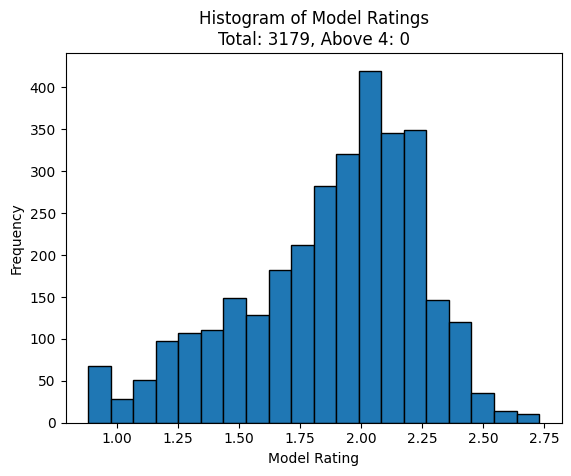

In [5]:
predictor = XGBoostDatabaseProcessor(db, data_field_names, model_path="xgboost_rating_model.pkl")

def plot_predictor_histogram(predictor):
    prep_data = predictor.get_prepared_data()
    predictions = predictor.predict(prep_data)

    # Calculate the total number of datapoints and the number of datapoints above 4 rating
    total_datapoints = len(predictions)
    datapoints_above_4 = np.sum(predictions >= 4)

    # Plot the histogram
    plt.hist(predictions, bins=20, edgecolor='black')
    plt.title(f'Histogram of Model Ratings\nTotal: {total_datapoints}, Above 4: {datapoints_above_4}')
    plt.xlabel('Model Rating')
    plt.ylabel('Frequency')
    plt.show()

plot_predictor_histogram(predictor)

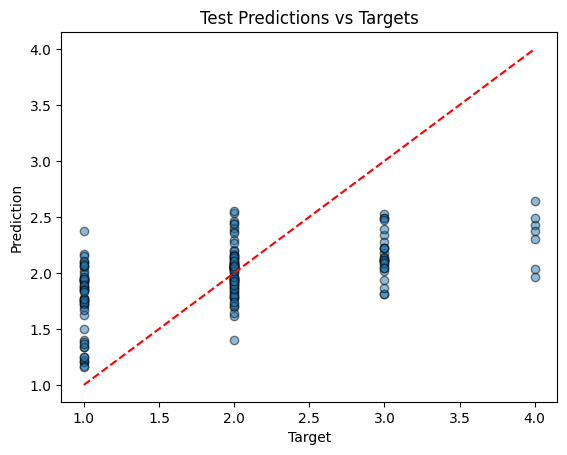

In [8]:
import matplotlib.pyplot as plt

def plot_test_preds(test_preds):
    # Extract predictions and targets from test_preds
    predictions = [item['prediction'] for item in test_preds]
    targets = [item['target'] for item in test_preds]

    # Create a scatter plot of predictions against targets
    plt.scatter(targets, predictions, alpha=0.5, edgecolors='k')
    plt.title('Test Predictions vs Targets')
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--')  # Line y=x for reference
    plt.show()
plot_test_preds(test_preds)


In [11]:
log_metric_field_name = f'log_{metric_field_name}'
data_df[log_metric_field_name] = np.log(data_df[metric_field_name])


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Testing RMSE: 0.3720896476161903
Testing AUC: 0.5
FPR: [0. 1.], TPR: [0. 1.], Thresholds: [inf  0.]


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [10:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


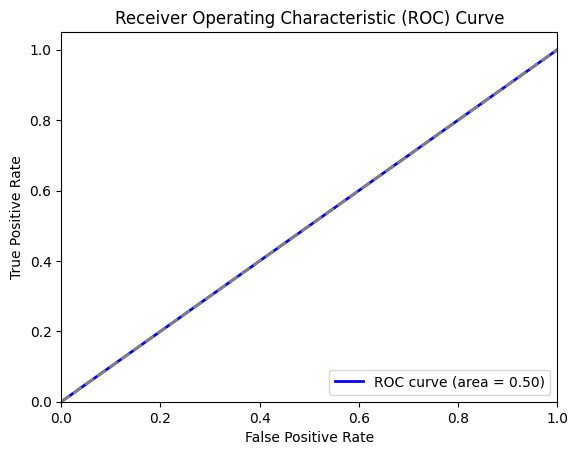

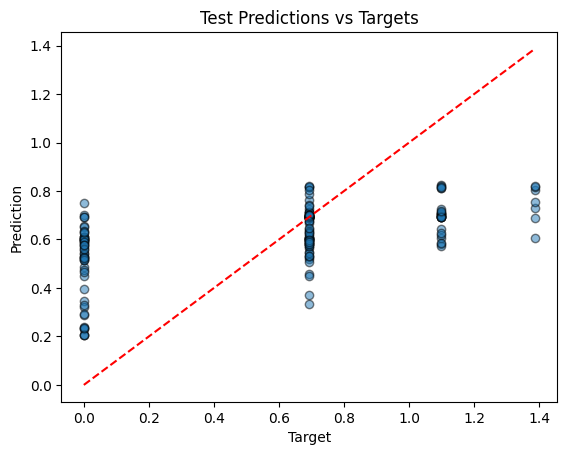

In [13]:
log_trainer = XGBoostRegressorTrainer(data_df, data_field_names, log_metric_field_name)
log_test_preds = log_trainer.fit(save_model_path="xgboost_rating_model_log.pkl", auc_threshold=np.log(4))
plot_test_preds(log_test_preds)


In [30]:
power2_metric_field_name = f'power2_{metric_field_name}'
data_df[power2_metric_field_name] = np.power(data_df[metric_field_name], 2)
power2_trainer = XGBoostRegressorTrainer(data_df, data_field_names, power2_metric_field_name)
power2_test_preds = power2_trainer.fit(save_model_path="xgboost_rating_model_power2.pkl", auc_threshold=4)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Testing RMSE: 12.560784405506633
Testing AUC: 0.5


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:26:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


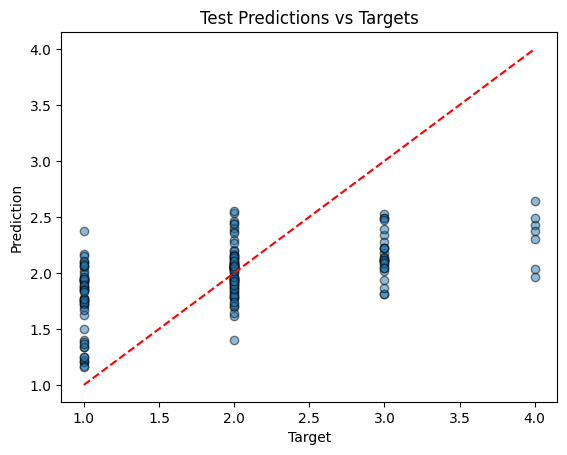

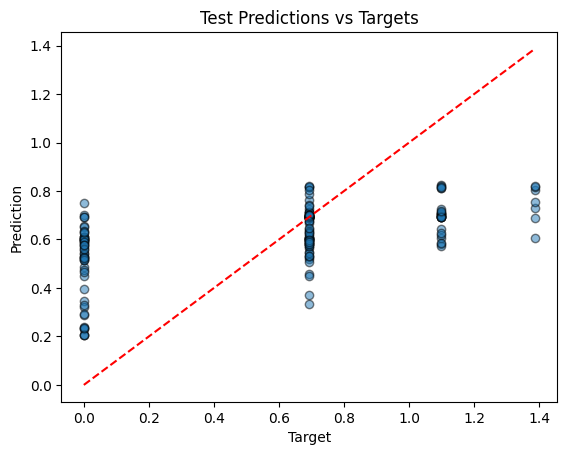

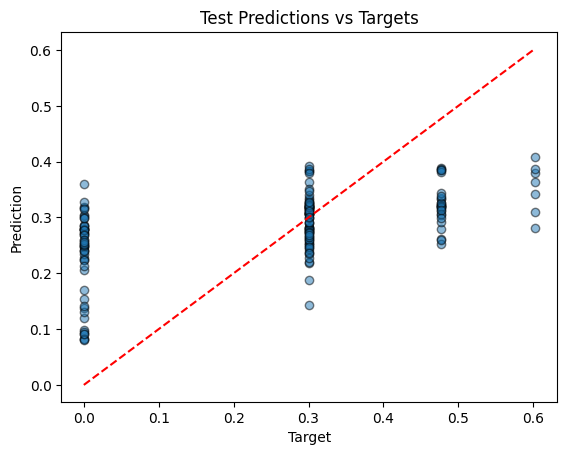

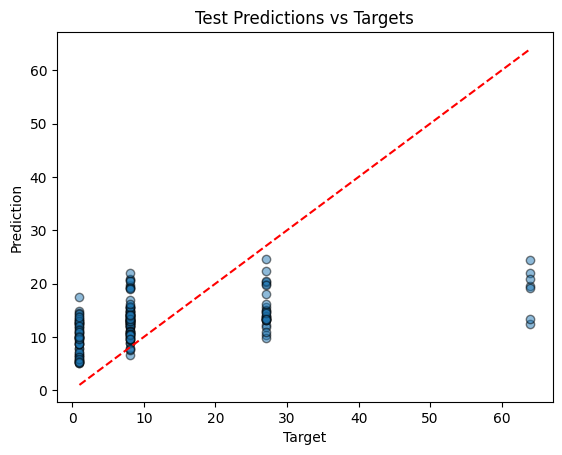

In [31]:
plot_test_preds(test_preds)
plot_test_preds(log_test_preds)
plot_test_preds(power2_test_preds)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Testing RMSE: 0.3733750526084975
Testing AUC: 0.5


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:52:21] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


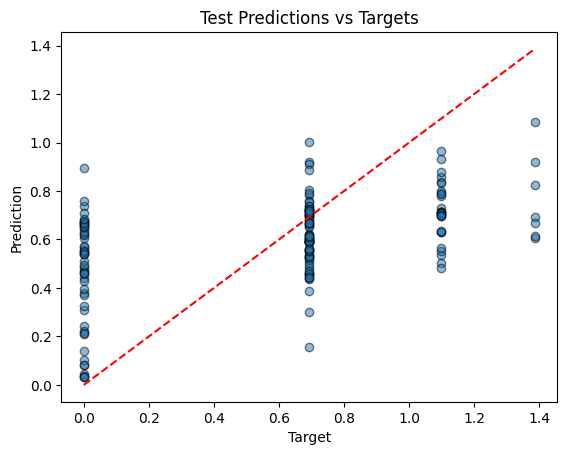

In [42]:
def weighted_mse(y_true):
    weights = np.where(y_true >= np.log(4), 1000, 1)
    return weights

log_trainer_weighted_metric_with_cross = XGBoostRegressorTrainer(data_df, data_field_names, log_metric_field_name, mse_weights_func=weighted_mse)
log_weighted_test_preds = log_trainer_weighted_metric_with_cross.fit(save_model_path="xgboost_rating_model_log_weighted.pkl", auc_threshold=np.log(4))
plot_test_preds(log_weighted_test_preds)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Testing RMSE: 0.7704760015368435
Testing AUC: 0.5


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


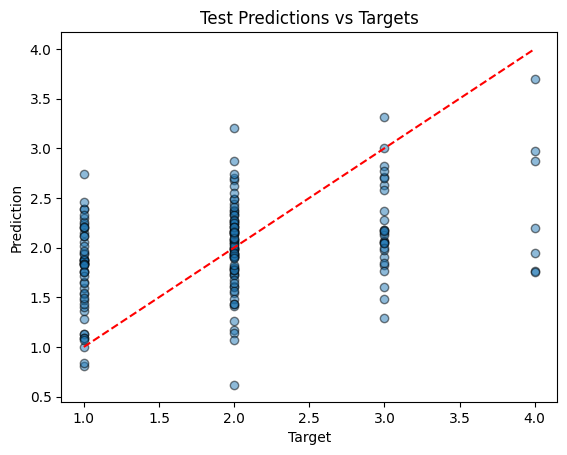

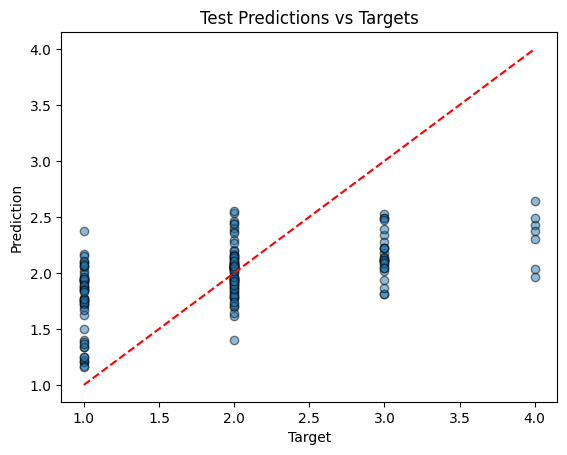

In [34]:
def weighted_mse(y_true):
    weights = np.where(y_true >= 4, 1000, 1)
    return weights

trainer_weighted_metric = XGBoostRegressorTrainer(data_df, data_field_names, metric_field_name, mse_weights_func=weighted_mse)
weighted_test_preds = trainer_weighted_metric.fit(save_model_path="xgboost_rating_model_weighted.pkl", auc_threshold=4)
plot_test_preds(weighted_test_preds)
plot_test_preds(test_preds)


In [40]:
data_with_cross_corr_df = data_df.copy()
similarity_score_columns = [col for col in data_df.columns if 'similarity_score' in col]
pick_score_col_name = "pick_score"
cross_corr_col_names = []
for sim_score_col in similarity_score_columns:
    cross_corr_col_name = f'cross_corr_{pick_score_col_name}_{sim_score_col}'
    data_with_cross_corr_df[cross_corr_col_name] = data_with_cross_corr_df[pick_score_col_name] * data_with_cross_corr_df[sim_score_col]
    cross_corr_col_names.append(cross_corr_col_name)

# Add quadratic columns
quadratic_col_names = []
for col in data_field_names:
    quadratic_col_name = f'{col}_quadratic'
    data_with_cross_corr_df[quadratic_col_name] = data_with_cross_corr_df[col] ** 2
    quadratic_col_names.append(quadratic_col_name)

# Update cross_corr_col_names to include quadratic columns
cross_corr_col_names.extend(quadratic_col_names)

data_with_cross_corr_df.head()



,_id,session_id,image_type,generated_epoch,prompt,negative_prompt,generating_lora,denoising_strength,hr_upscaler,hr_steps,...,power2_human_rating,cross_corr_pick_score_similarity_score_nearest,cross_corr_pick_score_similarity_score_average_k_nearest,cross_corr_pick_score_similarity_score_maximum_distance,cfg_scale_quadratic,pick_score_quadratic,similarity_score_nearest_quadratic,similarity_score_average_k_nearest_quadratic,similarity_score_maximum_distance_quadratic,generated_epoch_quadratic
0,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,1,208.007048,165.593107,320.775578,36.0,365.280701,118.448448,75.068508,281.692877,9
1,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,8,212.614645,210.629422,342.124005,36.0,381.395448,118.525240,116.322189,306.896255,9
2,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,27,230.558761,204.724600,350.475309,36.0,375.295066,141.641463,111.677892,327.296981,9
3,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,27,243.599217,220.685707,380.655322,36.0,383.537076,154.719276,126.981678,377.795220,9
4,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,27,193.811641,167.601888,304.138624,36.0,369.379047,101.692157,76.047608,250.421088,9


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Testing RMSE: 0.38673557068662306
Testing AUC: 0.5


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


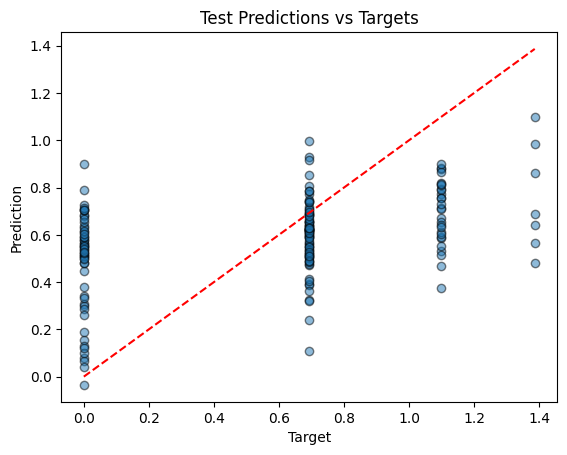

In [41]:
def weighted_mse(y_true):
    weights = np.where(y_true >= np.log(4), 1000, 1)
    return weights

log_trainer_weighted_metric_with_cross = XGBoostRegressorTrainer(data_with_cross_corr_df, data_field_names + cross_corr_col_names, log_metric_field_name, mse_weights_func=weighted_mse)
log_weighted_with_cross_corr_test_preds = log_trainer_weighted_metric_with_cross.fit(save_model_path="xgboost_rating_model_log_weighted.pkl", auc_threshold=np.log(4))
plot_test_preds(log_weighted_with_cross_corr_test_preds)



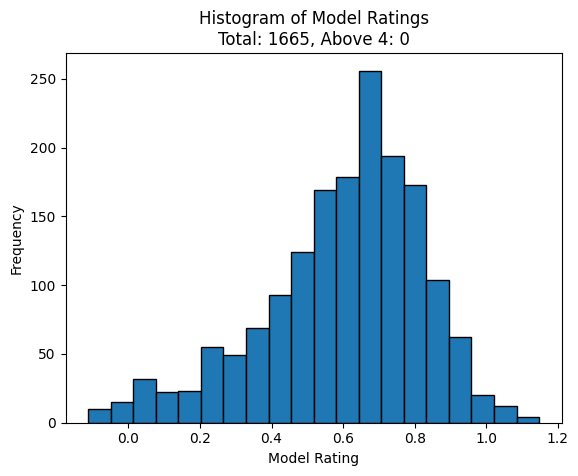

1.3862943611198906

In [47]:
new_predictor = XGBoostDatabaseProcessor(db, data_field_names, model_path="xgboost_rating_model_log_weighted.pkl", filters={metric_field_name: None})
plot_predictor_histogram(new_predictor)
np.log(4)